In [8]:
import subprocess
import sys
import os
from IPython.display import clear_output
import platform

In [4]:
times = {
    0:[],
    1:[]
}

for val in [0,1]:
    os.environ["PYTHONGIL"] = str(val)
    for threads in range(1,51):
        clear_output(wait=True)
        if val == 0:
            print("NoGil is active")
        else:
            print("NoGil is not active")
        print("Threads:", threads)
        output = subprocess.check_output(f"python fib.py {threads}", shell=True)
        tm = float(output.decode(sys.stdout.encoding).replace('\n',''))
        times[val].append(tm)


NoGil is not active
Threads: 50


In [6]:
times[0]

[0.574,
 0.601,
 0.603,
 0.625,
 0.71,
 0.784,
 0.894,
 0.97,
 1.124,
 1.306,
 1.445,
 1.595,
 1.849,
 2.192,
 2.127,
 2.191,
 2.185,
 2.407,
 2.524,
 2.681,
 2.943,
 2.973,
 3.26,
 3.483,
 3.464,
 3.615,
 3.827,
 4.177,
 4.037,
 4.235,
 4.394,
 4.6,
 4.769,
 4.869,
 5.057,
 5.199,
 5.604,
 5.707,
 5.712,
 5.858,
 5.967,
 6.118,
 6.458,
 6.84,
 6.899,
 6.908,
 7.185,
 7.462,
 7.358,
 7.451]

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing

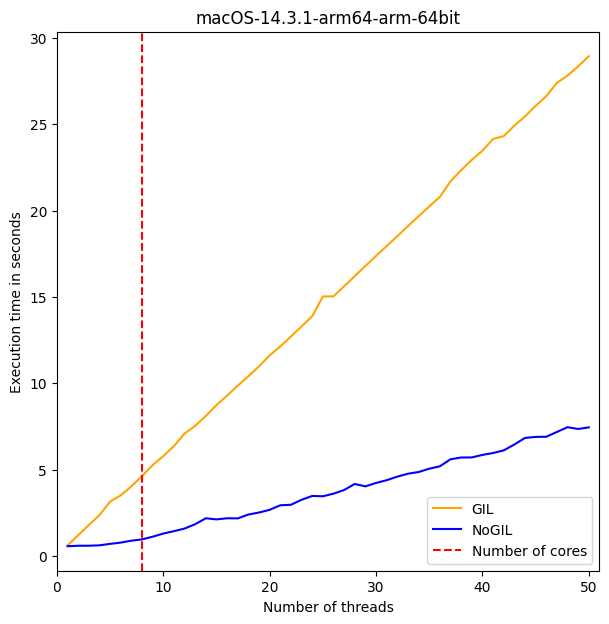

In [25]:
plt.figure(figsize=(7,7))
plt.plot(list(range(1,51)), times[1], color="orange")
plt.plot(list(range(1,51)), times[0], color="blue")
plt.axvline(x = multiprocessing.cpu_count(), color = 'r', linestyle = '--') 
plt.xlabel("Number of threads")
plt.ylabel("Execution time in seconds")
plt.title(platform.platform())
plt.legend(["GIL","NoGIL","Number of cores"])
plt.xlim((0,51))
plt.savefig(f"graph_{platform.platform()}.png", transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()